In [1]:
import sys
sys.path.insert(1, '../')
import numpy as np
import util.io as io
import matplotlib.pyplot as plt
from nufft import *
from util.fft import *
from scipy import interpolate
from tqdm.notebook import tqdm
from scipy.spatial import Voronoi, ConvexHull, convex_hull_plot_2d, voronoi_plot_2d

In [2]:
gridsize = 256
trajpath = '../lib/resource/data/spiral_1slice_1cha/kspacelocation.crd'
trajectory = io.getCrd(trajpath)
trajectory = np.moveaxis(trajectory, 0, -1)
datapath = '../lib/resource/data/spiral_1slice_1cha/spiral.dat'
data = np.squeeze(io.getData(datapath)) 

(-0.05, 0.05)

<Figure size 432x288 with 0 Axes>

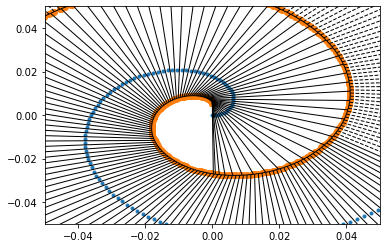

In [3]:
vor = Voronoi(trajectory[:300])
plt.figure()
voronoi_plot_2d(vor)
plt.xlim(-0.05, 0.05)
plt.ylim(-0.05, 0.05)

In [ ]:
dcf = voronoidcf(trajectory, 95)
mat = np.zeros([gridsize, gridsize], dtype=complex)
mat = gridding(mat, data, trajectory, dcf)

In [ ]:
show(ifft2c(mat))